In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_excel( "D:\code\Học máy 2\do_an\study.xlsx")
df

,hours of study,pass
0,0.20,0
1,0.30,0
2,0.40,0
3,0.50,0
4,0.60,0
5,0.80,0
6,1.00,0
7,1.25,0
8,1.50,0
9,1.75,0


In [6]:
class logisticRegression:
    def __init__(self, learning_rate=0.01, num_iteration=1000):
        self.learning_rate=learning_rate
        self.num_iterations=num_iteration
        self.weights=None
        self.bias=None

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def fit(self ,X,y):
        num_samples, num_features=X.shape
        self.weights=np.zeros(num_features)
        self.bias=0

        for _ in range(self.num_iterations):
            linear_model=np.dot(X,self.weights)+self.bias
            predictions=self.sigmoid(linear_model)


            dw=(1/num_samples)*np.dot(X.T,(predictions-y))
            db=(1/num_samples)*np.sum(predictions-y)

            self.weights-=self.learning_rate*dw
            self.bias-=self.learning_rate*db

    def predict(self,X):
        linear_model=np.dot(X,self.weights)+self.bias
        predictions=self.sigmoid(linear_model)
        return [1 if p>=0.5 else 0 for p in predictions]
    
    
    def accuracy(self, y_true, y_pred):
        correct = 0
        total = len(y_true)
        for yt, yp in zip(y_true, y_pred):
            if yt == yp:
                correct += 1
        return correct / total
    

if __name__=="__main__":
    X=df.drop(['pass'],axis='columns')
    y=df['pass']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    # Khởi tạo và huấn luyện mô hình
    model =logisticRegression()
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập dữ liệu huấn luyện và tập dữ liệu kiểm tra
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Tính accuracy trên tập dữ liệu huấn luyện và tập dữ liệu kiểm tra
    train_acc = model.accuracy(y_train, train_predictions)
    test_acc = model.accuracy(y_test, test_predictions)
    
    print("Train Accuracy:", train_acc)
    print("Test Accuracy:", test_acc)

Train Accuracy: 0.9047619047619048
Test Accuracy: 0.5


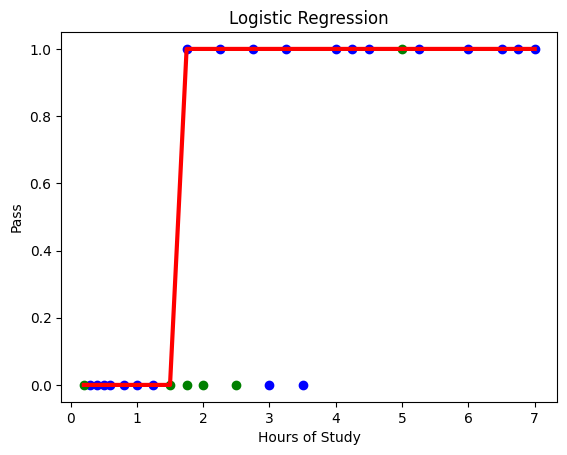

Predicted pass (1) or fail (0) for 8 hours of study: [1]


In [18]:
# Vẽ đường phân chia
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='green')
plt.xlabel('Hours of Study')
plt.ylabel('Pass')
plt.title('Logistic Regression')
plt.plot(X, model.predict(X), color='red', linewidth=3)
plt.show()

# Dự đoán với dữ liệu mới
hours_new = [[8]]
prediction = model.predict(hours_new)
print("Predicted pass (1) or fail (0) for 8 hours of study:", prediction)